-------------------------------------------------------------------------------------------------------------------------------
Copyright:

Ce notebook a été conçu  et rédigé par Linda Marrakchi-Kacem pour l'atelier Python "Segmentation de tumeurs cérébrales"  qui s'inscrit dans le cadre du mastère TICV à l'ENIT. Toute utilisation ou distribution de ce notebook en dehors du cadre de l'atelier doit porter la mention du nom de l'auteur.  

-------------------------------------------------------------------------------------------------------------------------------

# Chapitre 1 : Introduction à l'imagerie médicale

Ce notebook accompagne votre premier cours d'introduction à l'imagerie médicale et aux principales modalités d'imagerie médicale. Il a pour objectif de vous familiariser avec des manipulations simples de données médicales:
- lecture de données médicales
- sauvegarde de données médicales
- modification des données
- affichage des données

Pour pouvoir faire les exercices de ce notebook vous devez au préalable vérifier que les librairies suivantes sont installées et les installer dans le cas contraire:
- `numpy` : bibliothèque pour les calculs scientifiques et mathématiques.
- `opencv` : bibliothèque de traitement d'images.
- `pydicom` : bibliothèque conçue pour la manipulation du format DICOM.
- `matplotlib` : bibliothèque qui permet l'affichage de graphiques.
- `os` : bibliothèque dédiée aux besoins de gestion de fichiers et de dossiers.
- `ipywidgets` : bibliothèque qui rassemble l'ensemble des contrôles et composants graphiques (menus déroulants, boutons, sélecteurs, calendrier, etc) qui peuvent être utilisés dans des notebooks Jupyter avec le langage Python.
- `dicom2nifti` : bibliothèque pour la conversion du format dicom vers le format nifti.
- `nibabel` : bibliothèque pour la manipulation d'images sous format nifti.

## Exercice1:

L'objectif de cet exercice est de comparer une image classique au format "jpg" et contenant des données médicales à une image du même sujet mais sauvegardée sous le format médical DICOM. L'image DICOM de cet exercice provient du site https://www.cancerimagingarchive.net/

1) En utilisant la librairie opencv, lisez l'image "brain_067.jpg" et affichez les valeurs des intensités contenues dans l'image.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("brain_067.jpg",0)
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


2) A l'aide de la librairie matplotlib, affichez les intensités de gris de l'image.

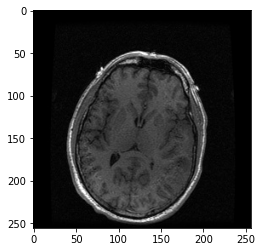

In [ ]:
plt.imshow(img,cmap="gray")

3) Affichez sa taille en pixels ainsi que sa valeur maximale.

In [ ]:
print(f"la taille de l'image {img.shape},la valeur maximal {img.max()}")

la taille de l'image (256, 256),la valeur maximal 255


4) Affichez la taille en mémoire de l'image à l'aide de la librairie os.

In [ ]:
import os
img_path ="brain_067.jpg"
stat_image = os.stat(img_path)
print(f"La taille de l'image {stat_image.st_size} octet")
print(f"La taille de l'image {stat_image.st_size /(1024*1024)} Mb")


La taille de l'image 19844 octet
La taille de l'image 0.018924713134765625 Mb


5) Importez la librairie pydicom, lisez le fichier "brain_067.dcm" et affichez son contenu.

In [ ]:
! pip install pydicom
import pydicom
#from pydicom.data import get_testdata_file
#filename = get_testdata_file("brain_067.dcm")
ds=pydicom.dcmread("brain_067.dcm")
ds


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.8 MB/s 


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.303991077508412432463357302508
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.27'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.303991077508412432463357302508
(0008, 0020) Study Date         

6) Affichez sa taille en mémoire à l'aide de la librairie os.

In [ ]:
img_path ="brain_067.dcm"
stat_image = os.stat(img_path)
print(f"La taille de l'image {stat_image.st_size} octet")
print(f"La taille de l'image {stat_image.st_size /(1024*1024)} Mb")

La taille de l'image 133380 octet
La taille de l'image 0.12720108032226562 Mb


7) Affichez le contenu de l'image.

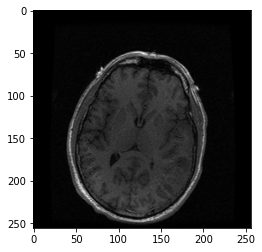

In [ ]:


plt.imshow(ds.pixel_array,cmap="gray")


8) Affichez la valeur maximale des niveaux de gris de l'image

In [ ]:
ds.pixel_array.max()


331

9) Comparez ce que vous avez obtenu pour le fichier .jpg ainsi que le fichier .dcm et expliquez.

10) En utilisant la librairie matplotlib, affichez les deux images .jpg et .dcm dans une même fenêtre avec les noms suivants pour chaque image (brain_jpg, brain_dcm)

Text(0.5, 1.0, 'brain_dcm')

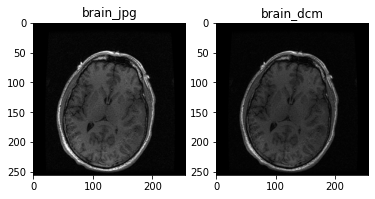

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap="gray")
ax.set_title('brain_jpg')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(ds.pixel_array,cmap="gray")
ax.set_title('brain_dcm')


## Exercice2:

L'objectif de cet exercice est d'apprendre à manipuler un volume de données DICOM et le visualiser.

1) Affichez le contenu des champs PatientName, PatientID, Modality, StudyDate de l'image DICOM préalablement chargée.

In [ ]:
print(dir(ds))
PatientName = ds[0x0010, 0x0010]
print(PatientName)
PatientID = ds[0x0010, 0x0020]
print(PatientID)
Modality = ds[0x0008, 0x0060]
print(Modality)
StudyDate = ds[0x0008, 0x0020]
print( StudyDate)

['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'AngioFlag', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'CardiacNumberOfImages', 'Columns', 'ContentCreatorName', 'ContentDate', 'ContentTime', 'DeidentificationMethod', 'DeviceSerialNumber', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FillerOrderNumberImagingServiceRequest', 'FlipAngle', 'FrameOfReferenceUID', 'HeartRate', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InstanceNumber', 'Laterality', 'LongitudinalTemporalInformationModified', 'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NumberOfAverages', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientWeight', 'PercentPhaseFieldOfView', 'PercentSampling', 'PersonName'

2) Modifiez le nom du patient et mettez comme nouveau nom "anonymous"

In [ ]:
ds.PatientName = "anonymous"
print(PatientName)

(0010, 0010) Patient's Name                      PN: 'anonymous'


3) Sauvegardez l'image DICOM sous le nouveau nom "brain_067_anonymous.dcm". L'objectif de ces deux opérations est d'anonymiser les noms des individus puisque les noms des patients doivent rester inconnus. Dans le cadre de ce notebook, la donnée de départ est déjà anonymisée mais au cas où vous travaillez avec un médecin et vous récupérez des données, vous devez absolument anonymiser vos données et remplacer les noms des individus par des identifiants.

In [ ]:
ds.save_as("brain_067_anonymous.dcm")

4) Les données DICOM se présentent généralement sous forme d'un ensemble de coupes 2D constituant un volume global 3D. Le répertoire DICOM_3D_volume contient un exemple d'ensemble de coupes 2D d'un cerveau humain. Stockez les noms de tous les fichiers contenus dans le répertoire DICOM_3D_volume dans une liste que vous appellerez list_filenames.

In [ ]:
import zipfile
with zipfile.ZipFile("/content/b/DICOM_3D_volume.zip","r") as zip_ref:
    zip_ref.extractall("/content/b")
    path = ("/content/b/DICOM_3D_volume")
    list_filenames = os.listdir(path)
list_filenames

5) En utilisant les lignes de code suivantes, créez un volume de données 3D regroupant toutes les coupes.

In [ ]:
import numpy as np
# Get a reference file
os.chdir(path)
reference_dataset = pydicom.dcmread(list_filenames[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(reference_dataset.Rows), int(reference_dataset.Columns), len(list_filenames))

# Load spacing values (in mm)
ConstPixelSpacing = (float(reference_dataset.PixelSpacing[0]), \
                     float(reference_dataset.PixelSpacing[1]), \
                     float(reference_dataset.SliceThickness))

print("volume dimensions : ", ConstPixelDims)
print("volume pixel spacing : ", ConstPixelSpacing)


# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=reference_dataset.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in list_filenames:
    # read the file
    ds = pydicom.dcmread(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, list_filenames.index(filenameDCM)] = ds.pixel_array

volume dimensions :  (256, 256, 124)
volume pixel spacing :  (1.015625, 1.015625, 1.2)


6) Ecrivez la fonction explore_3dimage_axial qui permet d'afficher le volume 3D en parcourant les coupes selon la direction z (vue axiale).

In [ ]:
#////////////////////
# colab keep disconnecting when i try to run this tab
#////////////////////


#!pip install dash
def explore_3dimage_axial (vol3d):


 #import dash




 vol = vol3d
 volume = vol.T
 r, c = volume[0].shape

# Define frames
 import plotly.graph_objects as go
 nb_frames = 68

 fig = go.Figure(frames=[go.Frame(data=go.Surface(
     z=(6.7 - k * 0.1) * np.ones((r, c)),
     surfacecolor=np.flipud(volume[67 - k]),
     cmin=0, cmax=200
     ),
     name=str(k) # you need to name the frame for the animation to behave properly
     )
     for k in range(nb_frames)])

# Add data to be displayed before animation starts
 fig.add_trace(go.Surface(
     z=6.7 * np.ones((r, c)),
     surfacecolor=np.flipud(volume[67]),
     colorscale='Gray',
     cmin=0, cmax=200,
     colorbar=dict(thickness=20, ticklen=4)
     ))


 def frame_args(duration):
     return {
             "frame": {"duration": duration},
             "mode": "immediate",
             "fromcurrent": True,
             "transition": {"duration": duration, "easing": "linear"},
         }

 sliders = [
             {
                 "pad": {"b": 10, "t": 60},
                 "len": 0.9,
                 "x": 0.1,
                 "y": 0,
                 "steps": [
                     {
                         "args": [[f.name], frame_args(0)],
                         "label": str(k),
                         "method": "animate",
                     }
                     for k, f in enumerate(fig.frames)
                 ],
             }
         ]

# Layout
 fig.update_layout(
          title='Slices in volumetric data',
          width=600,
          height=600,
          scene=dict(
                     zaxis=dict(range=[-0.1, 6.8], autorange=False),
                     aspectratio=dict(x=1, y=1, z=1),
                     ),
          updatemenus = [
             {
                 "buttons": [
                     {
                         "args": [None, frame_args(50)],
                         "label": "&#9654;", # play symbol
                         "method": "animate",
                     },
                     {
                         "args": [[None], frame_args(0)],
                         "label": "&#9724;", # pause symbol
                         "method": "animate",
                     },
                 ],
                 "direction": "left",
                 "pad": {"r": 10, "t": 70},
                 "type": "buttons",
                 "x": 0.1,
                 "y": 0,
             }
          ],
          sliders=sliders
 )

 fig.show(0)

explore_3dimage_axial (ArrayDicom)

7) Ecrivez les fonctions explore_3dimage_coronal et explore_3dimage_sagittal qui permettent de représenter le volume 3D respectiviement en vue coronale et sagittale et appliquez les au volume de données précédent.

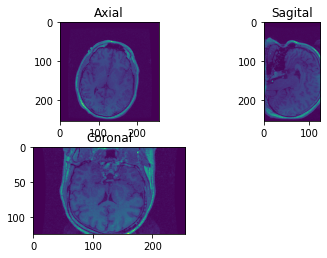

(256, 256)
(256, 256, 124)


In [ ]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os

path="/content/b/DICOM_3D_volume"
ct_images=os.listdir(path)

slices = [dicom.read_file(path+'/'+s,force=True) for s in ct_images]
#print(slices)
slices = sorted(slices,key=lambda x:x.ImagePositionPatient[2])

pixel_spacing = slices[0].PixelSpacing
slices_thickess = slices[0].SliceThickness

axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slices_thickess
coronal_aspect_ratio = slices_thickess/pixel_spacing[0]

#print("Pixel spacing is:",pixel_spacing)
#print("Slices Thickness is:",slices_thickess)

#print("Axial Aspect Ratio:",axial_aspect_ratio)
#print("Sagital Aspect Ratio:",sagital_aspect_ratio)
#print("Coronal Aspect Ratio:",coronal_aspect_ratio)

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
volume3d=np.zeros(img_shape)

for i,s in enumerate(slices):
    array2D=s.pixel_array
    volume3d[:,:,i]= array2D

axial=plt.subplot(2,2,1)
plt.title("Axial")
plt.imshow(volume3d[:,:,img_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)


plt.show()




print(array2D.shape)
print(volume3d.shape)



## Exercice3:


L'objectif de cet exercice est de vous familiariser avec le format nifti qui est une référence en neuroimagerie puisqu'il est plus léger que le format dicom et permet en même temps de garder des informations utiles sur l'acquisition pour les traiteurs d'images à travers son en-tête.

1) A l'aide de la librairie dicom2nifti, convertissez l'ensemble des coupes 2D contenues dans le dossier DICOM_3D_volume au format nifti.

In [ ]:
! pip install dicom2nifti
import dicom2nifti as df
nifti ="/content/b/nifti"
df.convert_directory(path, nifti)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2) A l'aide de la librairie nibabel, lisez le fichier "nifti_volume.nii"

In [ ]:
import nibabel as nb
from nibabel.testing import data_path
nifti = os.path.join(nifti,'/content/b/nifti/7_3d_volume.nii.gz')
load = nb.load(nifti)

3) Affichez les données de ce nouveau volume.

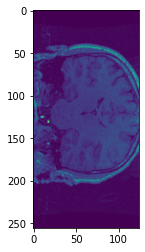

In [ ]:
plt.imshow(load.get_fdata()[:,100,:])

4) Uilisez la fonction explore_3dimage_axial que vous avez codée dans l'exercice précédent pour affichez le nouveau volume en vue axiale:

In [ ]:
def explore_3dimage_axial (load):
  plt.imshow(load[:,:,60])
